# ---------------------------------------------------------------------------------------------------------------
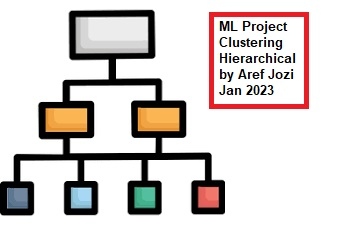

## Machine Learning Tutorials using Python
## Designed by : maktabkhooneh.org
## Tutor : Jadi Mirani
## Learner : Aref Jozi

#### This is my tutorial project of a dataset including some features about "customers" . The purpose is to identify their class/category (cluster) by unsupervised ML algorithms namely "K-Means" , "Hierarchical" , "DBSCAN" .
### this ipynb file is for : 2. Hierarchical

#### Done by Aref Jozi on Jan 2023

#### This project is designed by collaboration of maktabkhooneh and Jadi and represented in Season 4 (Clustering) of Machine Learning by Python
# ---------------------------------------------------------------------------------------------------------------

# 2.Hierarchical Clustering - Agglomerative

### importing libraries

In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

### loading data from csv file and analysing the dataframe

In [2]:
# the csv file address may differ in various computers
cust_df = pd.read_csv("e:/1632560262896716.csv")
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print ("Shape of dataset: ", cust_df.shape)

Shape of dataset:  (200, 5)


In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
cust_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
cust_df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [8]:
cust_df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [9]:
cust_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
Gender = cust_df['Gender'].replace(['Female','Male'],[0,1],inplace=True)
print(Gender)

None


In [11]:
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [12]:
cust_df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [14]:
cust_df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


### normalization

In [15]:
# the approach in this clustering method is to consider Gender as a numerical value

In [16]:
from sklearn.preprocessing import MinMaxScaler
x = cust_df.values[:,1:] #ignoring Customer id
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

### hierarchical clustering by Scipy

In [17]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

C:\Users\Albaloo.Co\AppData\Local\Temp/ipykernel_13156/458117257.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


array([[0.        , 0.43029381, 1.05538015, ..., 1.00888686, 1.0528145 ,
        1.11639204],
       [0.43029381, 0.        , 1.25941672, ..., 0.93683095, 1.20748243,
        1.01507247],
       [1.05538015, 1.25941672, 0.        , ..., 1.53221213, 1.43245312,
        1.62419301],
       ...,
       [1.00888686, 0.93683095, 1.53221213, ..., 0.        , 0.57849818,
        0.13432353],
       [1.0528145 , 1.20748243, 1.43245312, ..., 0.57849818, 0.        ,
        0.66437953],
       [1.11639204, 1.01507247, 1.62419301, ..., 0.13432353, 0.66437953,
        0.        ]])

In [19]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')
Z

C:\Users\Albaloo.Co\AppData\Local\Temp/ipykernel_13156/2533680889.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


array([[3.00000000e+00, 5.00000000e+00, 9.82608009e-02, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 1.14253032e-01, 2.00000000e+00],
       [6.00000000e+01, 7.00000000e+01, 1.15764987e-01, 2.00000000e+00],
       [6.50000000e+01, 6.80000000e+01, 1.49974111e-01, 2.00000000e+00],
       [1.14000000e+02, 1.15000000e+02, 2.06138951e-01, 2.00000000e+00],
       [1.12000000e+02, 1.21000000e+02, 2.08295653e-01, 2.00000000e+00],
       [1.17000000e+02, 1.19000000e+02, 2.17050642e-01, 2.00000000e+00],
       [1.47000000e+02, 1.59000000e+02, 2.22972504e-01, 2.00000000e+00],
       [1.03000000e+02, 1.20000000e+02, 2.54519176e-01, 2.00000000e+00],
       [1.73000000e+02, 1.79000000e+02, 2.62175600e-01, 2.00000000e+00],
       [6.20000000e+01, 6.70000000e+01, 2.66326640e-01, 2.00000000e+00],
       [4.60000000e+01, 5.00000000e+01, 2.66522500e-01, 2.00000000e+00],
       [8.40000000e+01, 8.70000000e+01, 2.69050741e-01, 2.00000000e+00],
       [9.90000000e+01, 1.13000000e+02, 2.69189568e

In [20]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([20, 20,  1,  7, 10,  7,  1,  7, 14,  7, 14,  7,  2,  7, 16, 20, 10,
       20, 15,  7, 16, 20,  2, 20,  2, 20, 10, 17, 10,  7, 14,  7, 14, 20,
        2,  7, 10,  7, 10,  7,  3, 20, 17,  9, 10,  7, 11,  9,  9,  9, 11,
       17,  9, 15, 11, 17, 11, 15,  9, 15, 15, 21,  3, 11, 15, 21, 11,  3,
       21,  9, 15, 11,  3,  3, 15, 21, 11, 17,  9, 11, 15, 17, 15, 11,  9,
       17, 11,  9, 11, 11,  3, 21, 17, 11,  9, 21, 11,  9, 17, 21,  9, 11,
       15, 21, 17,  9,  3, 15, 15, 15, 15,  9, 11, 21,  9,  9,  3, 11, 11,
       11, 21, 11, 11, 19,  9,  8, 17, 19, 12, 21, 12, 21,  9,  8, 13,  6,
        4, 21, 13,  8,  5, 19,  9,  6, 13, 19, 17,  8,  4, 19, 12, 19,  4,
        8,  4,  6, 12,  8, 12,  8,  3,  6, 13,  6, 12,  8, 12,  6,  4, 21,
       12, 21, 12, 19,  5,  6, 12, 21, 12, 19,  4,  6, 12,  6,  4, 19,  5,
       21,  4,  6,  4,  6, 13,  6,  5,  6,  5, 18, 13, 18], dtype=int32)

In [21]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([5, 5, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 4, 5, 2, 5, 3, 2, 4, 5,
       1, 5, 1, 5, 2, 4, 2, 2, 3, 2, 3, 5, 1, 2, 2, 2, 2, 2, 1, 5, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 4, 2, 3, 2, 3, 3, 5, 1, 2, 3, 5,
       2, 1, 5, 2, 3, 2, 1, 1, 3, 5, 2, 4, 2, 2, 3, 4, 3, 2, 2, 4, 2, 2,
       2, 2, 1, 5, 4, 2, 2, 5, 2, 2, 4, 5, 2, 2, 3, 5, 4, 2, 1, 3, 3, 3,
       3, 2, 2, 5, 2, 2, 1, 2, 2, 2, 5, 2, 2, 5, 2, 2, 4, 5, 3, 5, 3, 5,
       2, 2, 3, 2, 1, 5, 3, 2, 1, 5, 2, 2, 3, 5, 4, 2, 1, 5, 3, 5, 1, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 5, 3, 5, 3, 5, 1, 2,
       3, 5, 3, 5, 1, 2, 3, 2, 1, 5, 1, 5, 1, 2, 1, 2, 3, 2, 1, 2, 1, 5,
       3, 5], dtype=int32)

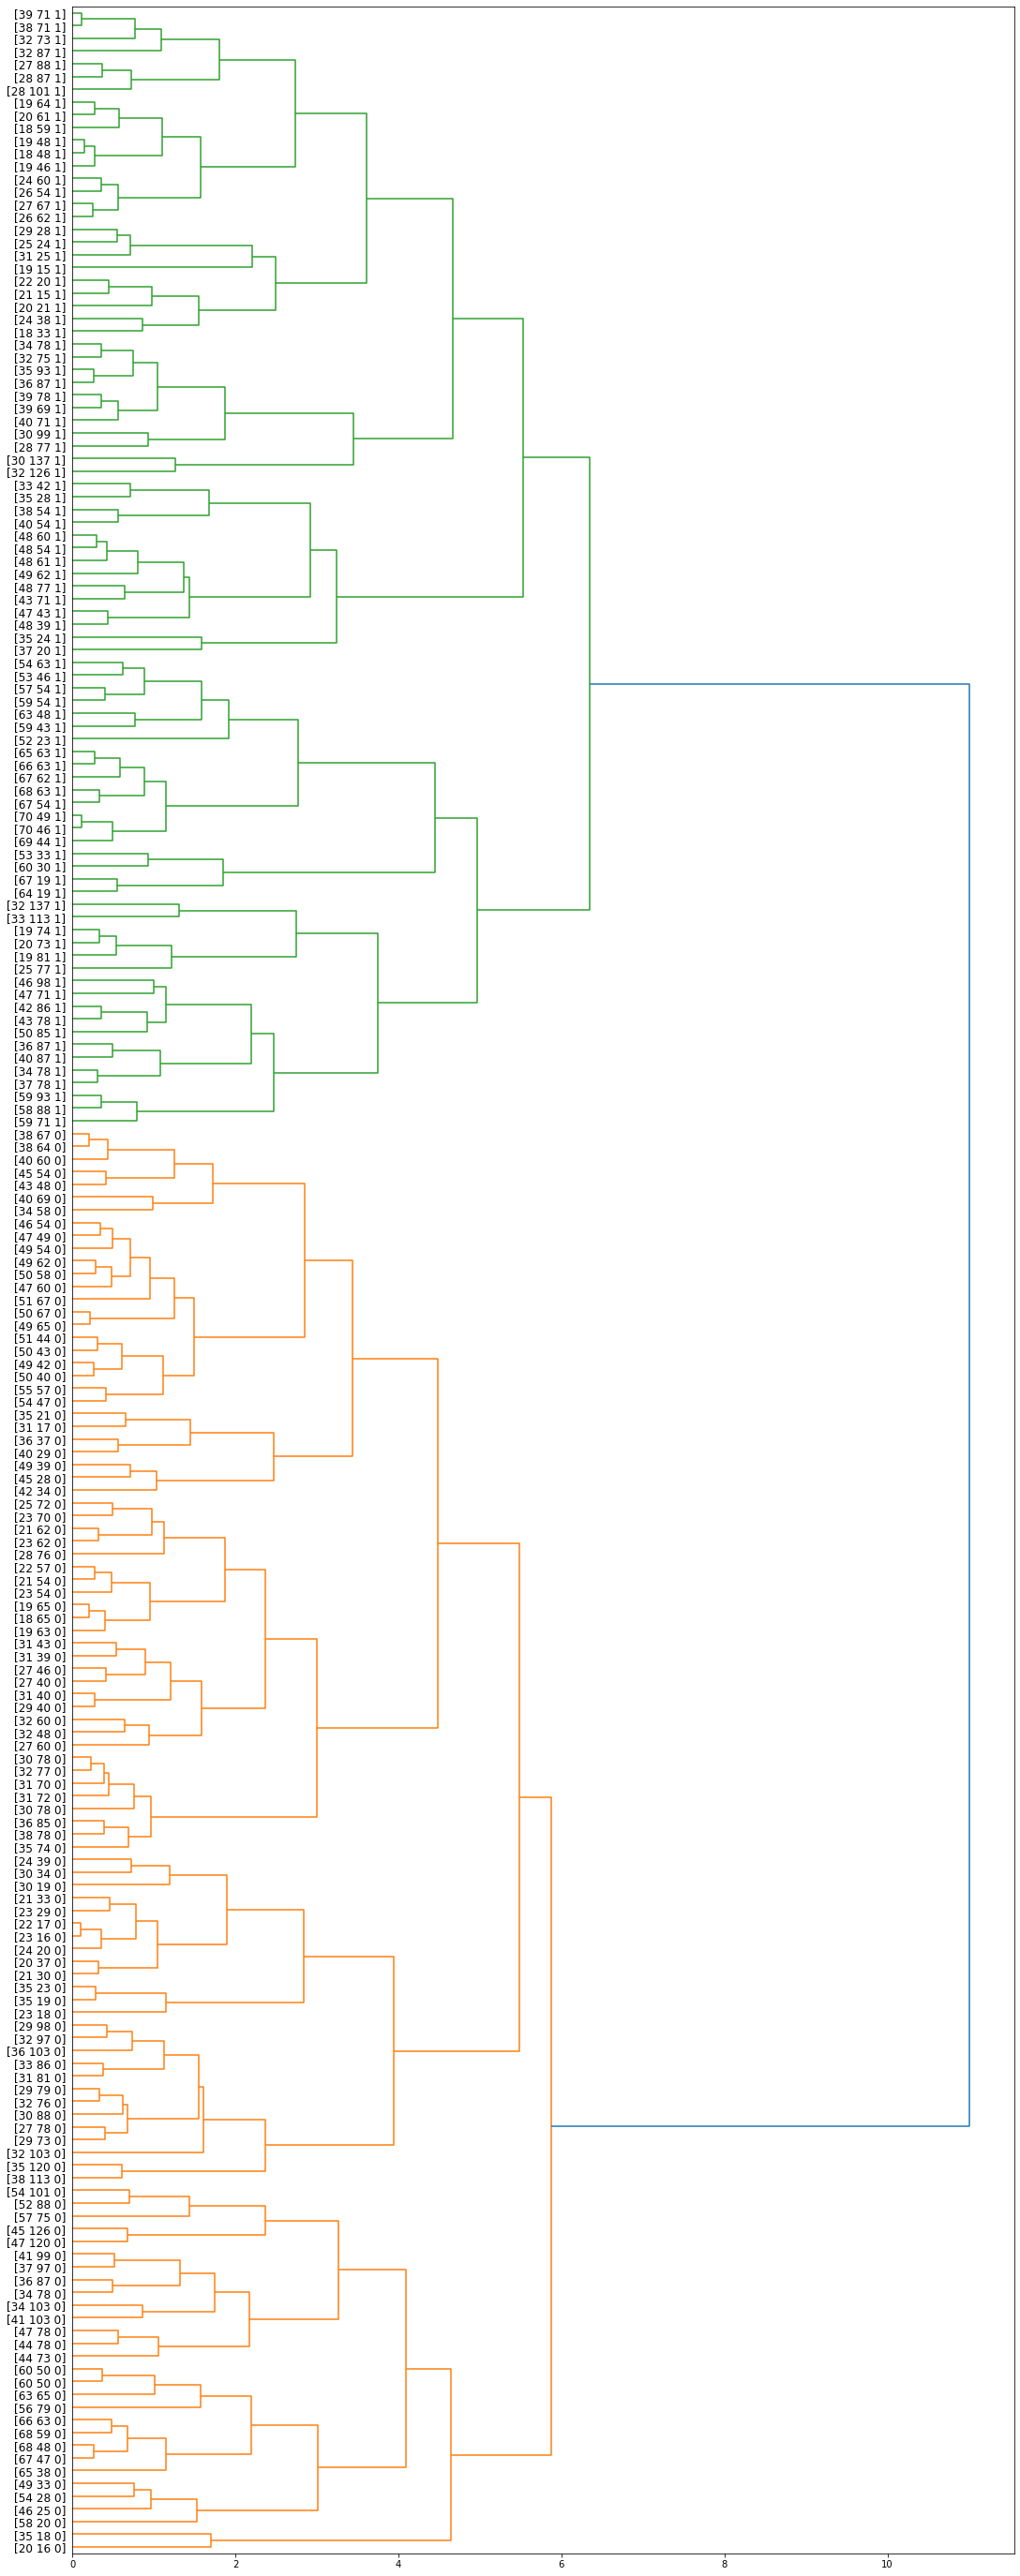

In [22]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (cust_df['Age'][id], cust_df['Annual Income (k$)'][id], int(float(cust_df['Gender'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### hierarchical clustering by scikit-learn

In [23]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [24]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')
Z

C:\Users\Albaloo.Co\AppData\Local\Temp/ipykernel_13156/3108955837.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


array([[3.00000000e+00, 5.00000000e+00, 9.82608009e-02, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 1.14253032e-01, 2.00000000e+00],
       [6.00000000e+01, 7.00000000e+01, 1.15764987e-01, 2.00000000e+00],
       [6.50000000e+01, 6.80000000e+01, 1.49974111e-01, 2.00000000e+00],
       [1.14000000e+02, 1.15000000e+02, 2.06138951e-01, 2.00000000e+00],
       [1.12000000e+02, 1.21000000e+02, 2.08295653e-01, 2.00000000e+00],
       [1.17000000e+02, 1.19000000e+02, 2.17050642e-01, 2.00000000e+00],
       [1.47000000e+02, 1.59000000e+02, 2.22972504e-01, 2.00000000e+00],
       [1.03000000e+02, 1.20000000e+02, 2.54519176e-01, 2.00000000e+00],
       [1.73000000e+02, 1.79000000e+02, 2.62175600e-01, 2.00000000e+00],
       [6.20000000e+01, 6.70000000e+01, 2.66326640e-01, 2.00000000e+00],
       [4.60000000e+01, 5.00000000e+01, 2.66522500e-01, 2.00000000e+00],
       [8.40000000e+01, 8.70000000e+01, 2.69050741e-01, 2.00000000e+00],
       [9.90000000e+01, 1.13000000e+02, 2.69189568e

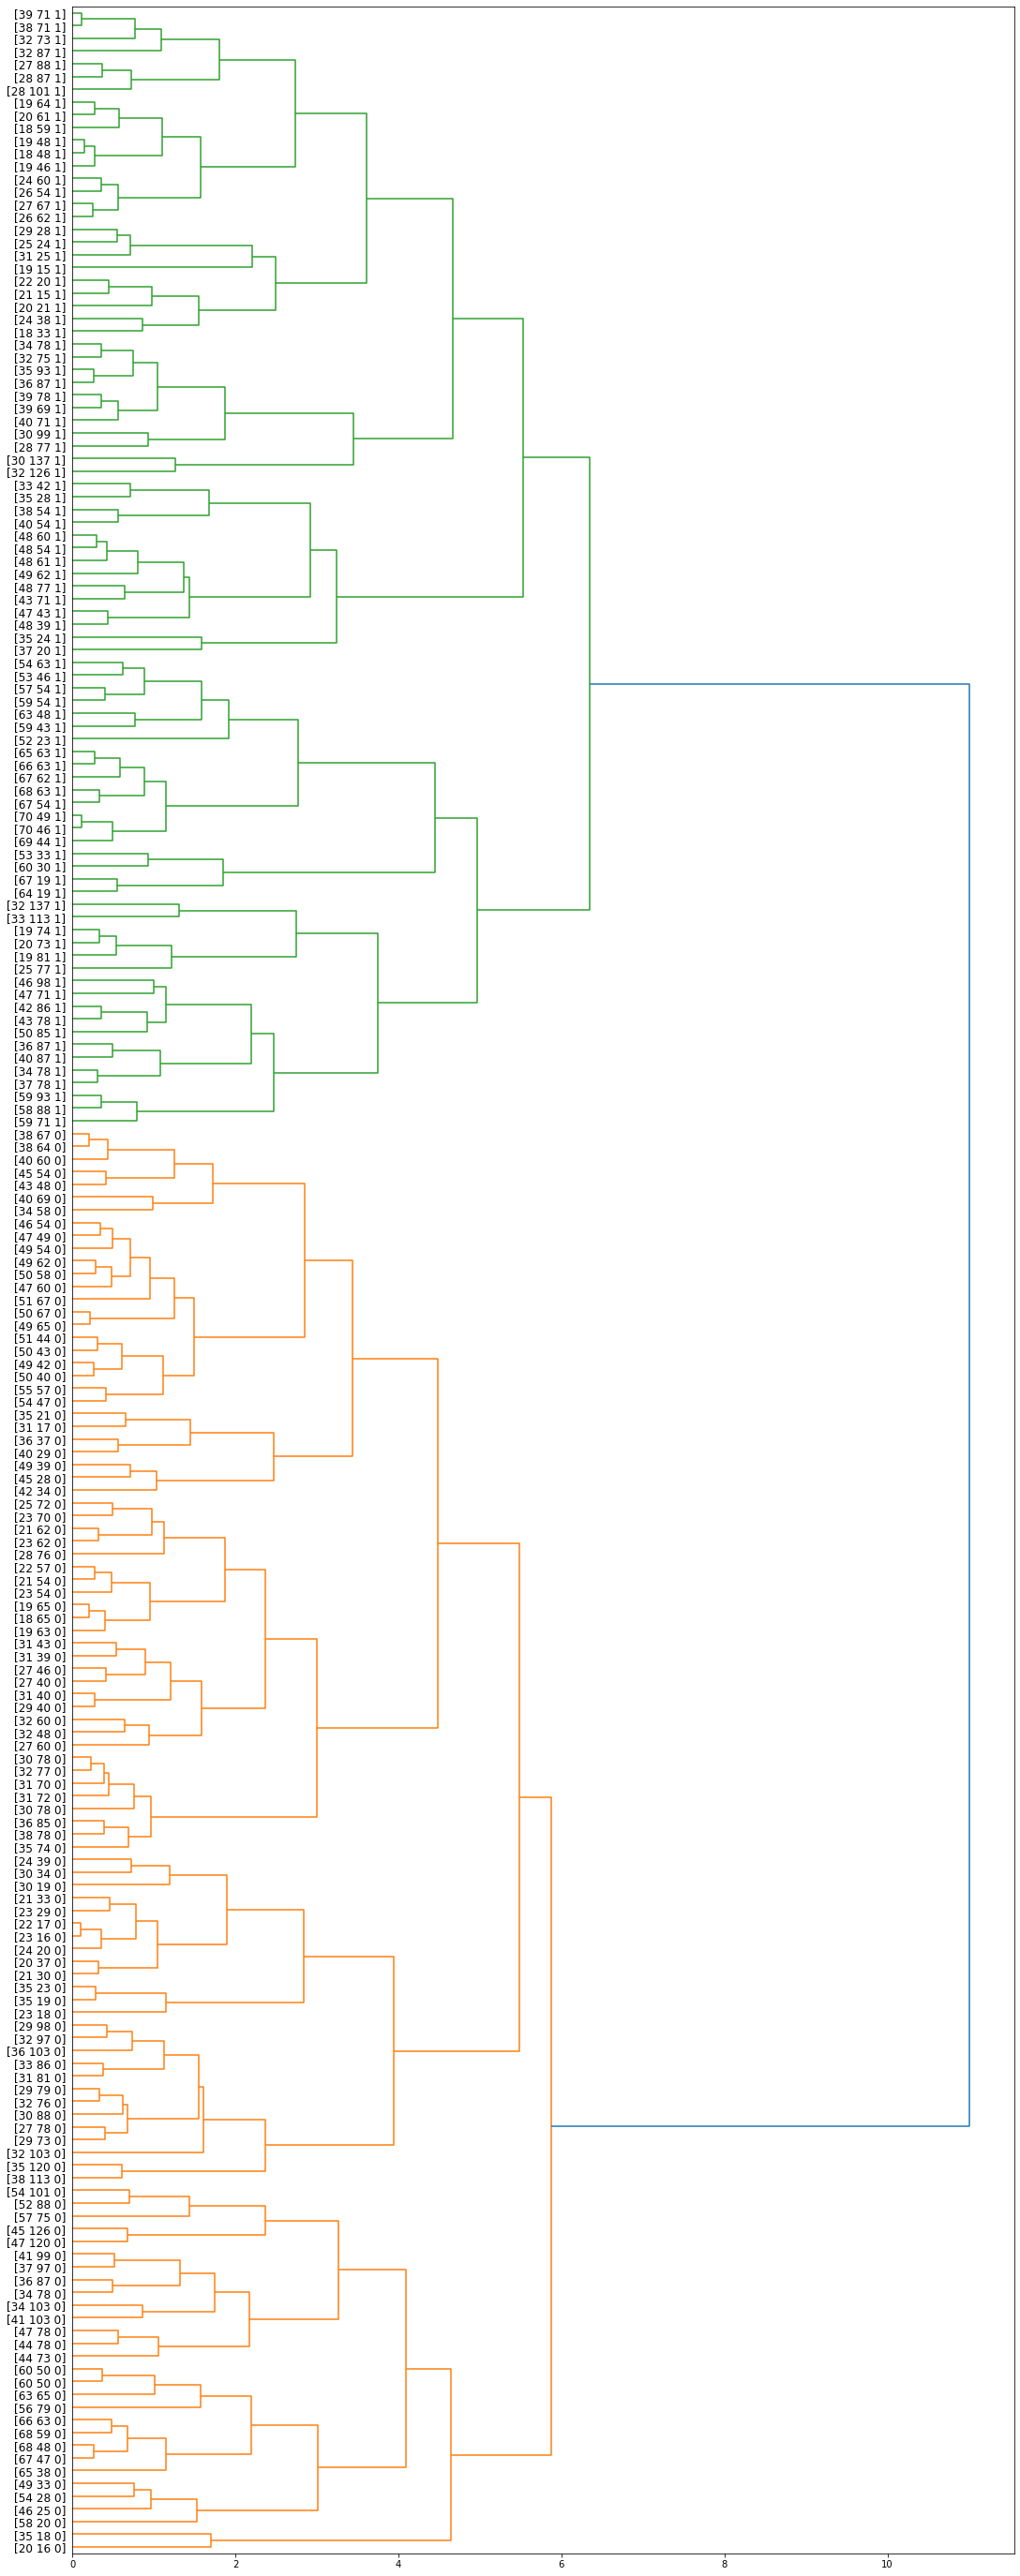

In [25]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (cust_df['Age'][id], cust_df['Annual Income (k$)'][id], int(float(cust_df['Gender'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [31]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\Albaloo.Co\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [32]:
cust_df['cluster_'] = agglom.labels_
cust_df.head()

,CustomerID,Gender,Age,anin,spsc,cluster_
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [33]:
# making column names shorter
cust_df = cust_df.rename({'Annual Income (k$)': 'anin', 'Spending Score (1-100)': 'spsc'}, axis=1)
cust_df

,CustomerID,Gender,Age,anin,spsc,cluster_
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,1
197,198,1,32,126,74,0
198,199,1,32,137,18,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'spsc')

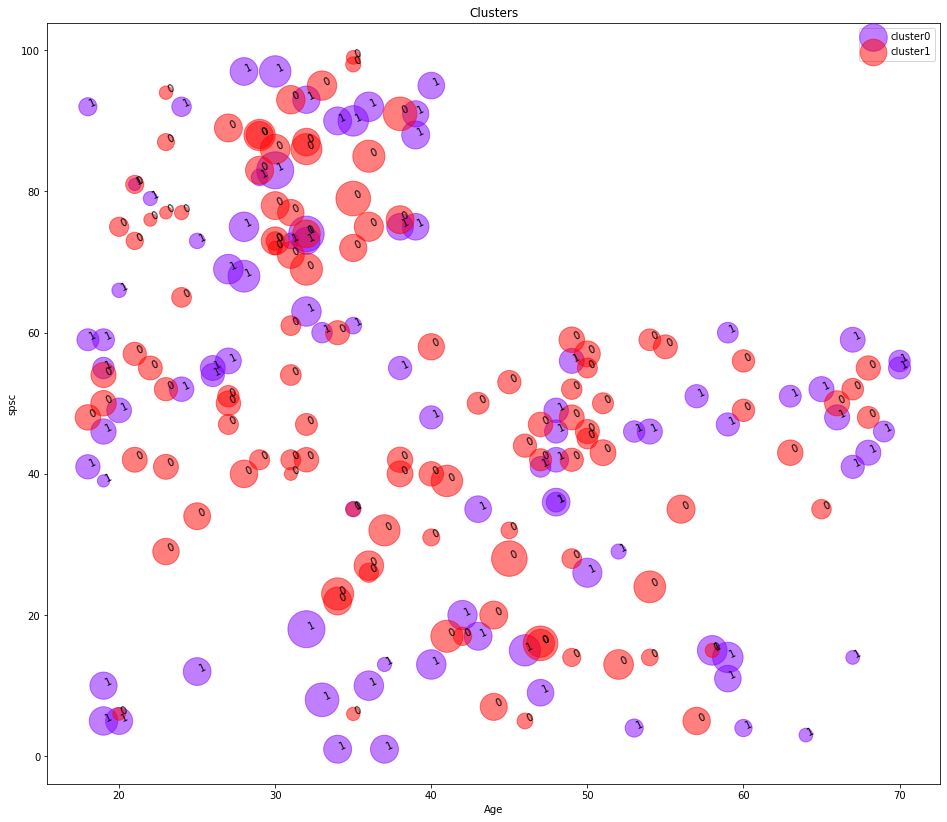

In [34]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = cust_df[cust_df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset.spsc[i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Age, subset.spsc, s= subset.anin*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('spsc')

In [35]:
cust_df.groupby(['cluster_','Gender'])['cluster_'].count()

cluster_  Gender
0         1          88
1         0         112
Name: cluster_, dtype: int64